# **Final Exam for Deep Network Development course. First part (mandatory)**

## Your information
Please fill the next cell with your information

**Full Name**:

**Neptun code:**

**Date:** 16/01/2024 10AM-11AM

## Task Description

#### Your task is to implement a custom architecture inspired by **LSTM**, and the **forward function**. The model receives an **image** as input and generates a **caption** of the image.

#### Afterwards, make sure to run cell **3. Testing your implementation** to check if your implementation is correct.

#### This task should be **SOLVED IN 1 HOUR** and submitted to Canvas (download the .ipynb file). Please note that after 1 hour, the Canvas exam assignment will be closed and you cannot submit your solution.

## Basic Imports

All packages necessarry are already imported for you.

In [2]:
import torch
import numpy as np
import torch.nn as nn
import requests
import math
import matplotlib.pyplot as plt
from torch import nn
from torchvision import models
from torchvision import transforms
import io
from io import BytesIO
from PIL import Image
from urllib.request import urlopen
import torch.nn.functional as F

#### **NO GPU IS NEEDED for this task**. No training nor any computationally expensive operation will be performed. This notebook runs on any computer using a cpu.

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## 1. Architecture Description and Visualization

#### Please keep in mind that this architecture is purely imagined and should not correspond to any existing model You will not find it on the internet.

 **CORRECTION: !!!! C = C*V !!!!!!**

Please right click the image and "Open image in a new tab" to view it better with zoom. Or download it from here: https://drive.google.com/file/d/1JQcofDuOAMkARUE4JRm43kBtu-AINun9/view?usp=drive_link

<br>
<br>

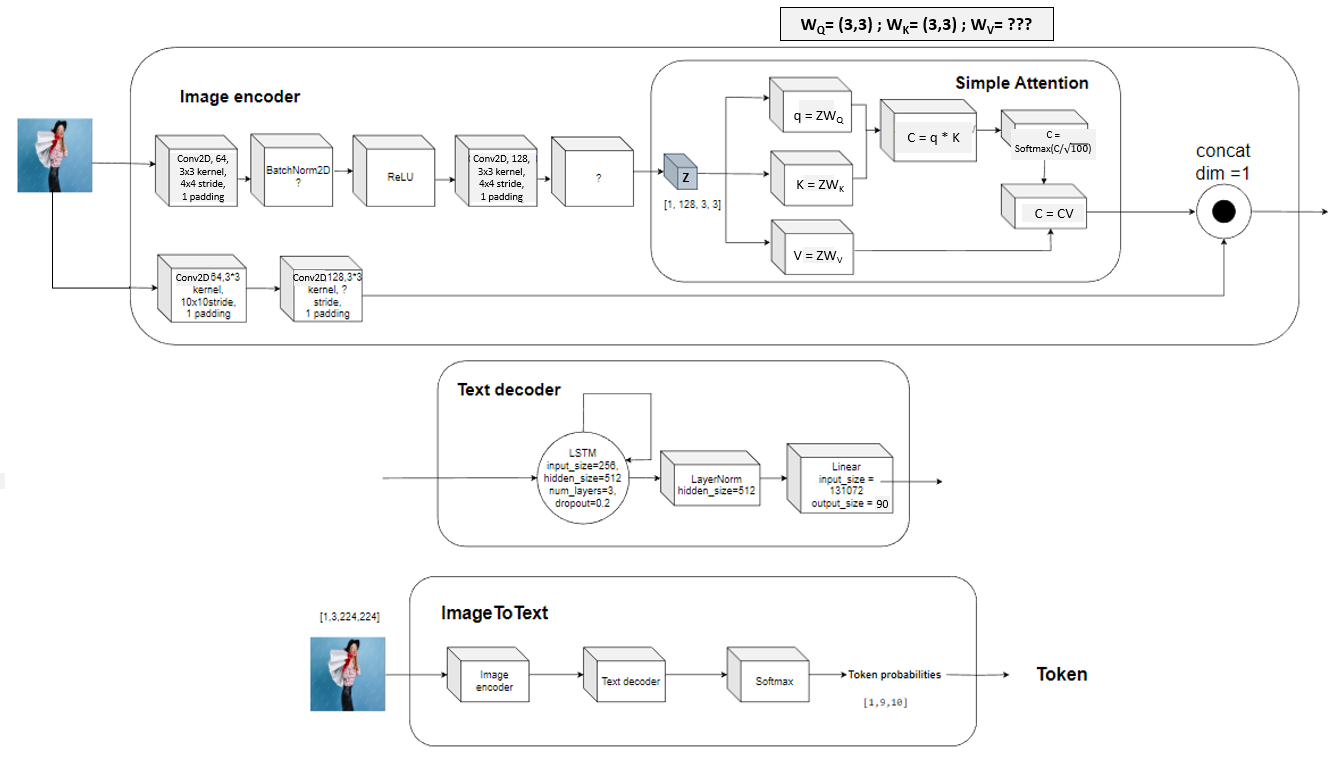

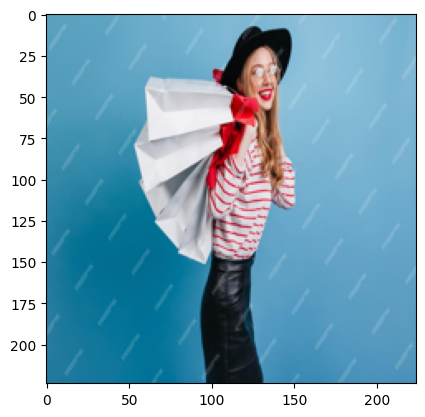

In [4]:
response = requests.get("https://img.freepik.com/free-photo/merry-girl-leather-skirt-holding-shopping-bags-studio-shot-appealing-blonde-woman-hat-isolated-blue-background_197531-27310.jpg?w=1380&t=st=1705141783~exp=1705142383~hmac=0476c52ec144d19e7e6c11a22c00bd48300607f9b4b9b154ca7c6d7f6184a3b1")
image = Image.open(BytesIO(response.content)).convert('RGB')
image = image.resize((224, 224))
plt.imshow(image)

In [5]:
# Load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    image = preprocess(image)
    image = image.unsqueeze(0)  # Add batch dimension
    return image

input_image = load_image(BytesIO(response.content))
print(input_image.size())

torch.Size([1, 3, 224, 224])


### Create vocabulary

In [23]:
vocabulary = ['a','girl','shopping','bag','woman','happy','white','glasses','red','with']

# Create a mapping from word to index
word_to_idx = {i: word for i, word in enumerate(vocabulary)}
print(word_to_idx)

{0: 'a', 1: 'girl', 2: 'shopping', 3: 'bag', 4: 'woman', 5: 'happy', 6: 'white', 7: 'glasses', 8: 'red', 9: 'with'}


### 2. Implementing the architecture.

**MODIFY THIS CELL ONLY**

In [7]:
Q = torch.tensor([[ 0.1,  0.2,  0.3],
                  [ 0.4,  0.5,  0.6],
                  [ 0.7,  0.8,  0.9]])

K = torch.tensor([[ 0.2,  0.3,  0.4],
                  [ 0.5,  0.6,  0.7],
                  [ 0.8,  0.9,  1.0]])

#use random values
#V = ???


In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class ImageEncoder(nn.Module):
    def __init__(self):
        super(ImageEncoder, self).__init__()

        # Define convolutional layers as per the diagram
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=4, padding=1)  # First Conv2D layer
        self.bn1 = nn.BatchNorm2d(64)  # BatchNorm2D
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=4, padding=1)
        self.maxpool = nn.MaxPool2d(kernel_size=5, stride=4, padding=0) 

        self.conv3 = nn.Conv2d(3, 64, kernel_size=3, stride=10, padding=1)  
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=10, padding=1)

    def forward(self, x):
        # Forward through convolutional layers
        z = self.conv1(x)
        print("conv1", z.shape)
        z = self.bn1(z)
        z = self.relu(z)
        z = self.conv2(z)
        print("conv2", z.shape)
        z = self.maxpool(z)
        print("maxpool", z.shape)
        Q = torch.tensor([[ 0.1,  0.2,  0.3],
                  [ 0.4,  0.5,  0.6],
                  [ 0.7,  0.8,  0.9]])
        Q_expanded = Q.unsqueeze(0).unsqueeze(0)  
        print("Q_expanded", Q_expanded.shape)
        Q_expanded = Q_expanded.expand(1, 128, 3, 3) 
        print("Q_expanded", Q_expanded.shape)
        q = z * Q_expanded
        print("q", q.shape)

        K = torch.tensor([[ 0.2,  0.3,  0.4],
                  [ 0.5,  0.6,  0.7],
                  [ 0.8,  0.9,  1.0]])
        K_expanded = K.unsqueeze(0).unsqueeze(0)
        print("K_expanded", K_expanded.shape)
        K_expanded = K_expanded.expand(1, 128, 3, 3)
        print("K_expanded", K_expanded.shape)
        k = z * K_expanded
        print("k", k.shape)

        C = q * k
        print("C", C.shape)

        C = F.softmax(C/ math.sqrt(128), dim=-1)
        print("C", C.shape)

        V = torch.randn(1, 128, 3, 3)
        print("V", V.shape)
        V = V.expand(1, 128, 3, 3)
        print("V", V.shape)
        v = z * V
        print("v", v.shape)

        C = C * v
        print("C", C.shape)

        


        y = self.conv3(x)
        print("conv3", y.shape)
        y = self.conv4(y)
        print("conv4", y.shape)

        output = torch.cat([C, y], dim=1)
        print("output", output.shape)
        # output = F.interpolate(
        #     output, 
        #     size=(16, 16), 
        #     mode='bilinear',  # or 'nearest', 'bicubic', etc.
        #     align_corners=False
        # )
        
        
        return output

# Testing the model
model = ImageEncoder()
input_image = torch.randn(1, 3, 224, 224)  # Input tensor with shape [1, 3, 224, 224]
output = model(input_image)
print("Output shape:", output.shape)

conv1 torch.Size([1, 64, 56, 56])
conv2 torch.Size([1, 128, 14, 14])
maxpool torch.Size([1, 128, 3, 3])
Q_expanded torch.Size([1, 1, 3, 3])
Q_expanded torch.Size([1, 128, 3, 3])
q torch.Size([1, 128, 3, 3])
K_expanded torch.Size([1, 1, 3, 3])
K_expanded torch.Size([1, 128, 3, 3])
k torch.Size([1, 128, 3, 3])
C torch.Size([1, 128, 3, 3])
C torch.Size([1, 128, 3, 3])
V torch.Size([1, 128, 3, 3])
V torch.Size([1, 128, 3, 3])
v torch.Size([1, 128, 3, 3])
C torch.Size([1, 128, 3, 3])
conv3 torch.Size([1, 64, 23, 23])
conv4 torch.Size([1, 128, 3, 3])
output torch.Size([1, 256, 3, 3])
Output shape: torch.Size([1, 256, 3, 3])


In [26]:
import torch
import torch.nn as nn

class TextDecoder(nn.Module):
    def __init__(self):
        super(TextDecoder, self).__init__()
        
        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=256,  
            hidden_size=512,
            num_layers=3,
            dropout=0.2,
            batch_first=True
        )
        
        
        self.layer_norm = nn.LayerNorm(512)
        
        
        # self.fc = nn.Linear(131072, 90)  # Input size is 131072, output size is 90
        self.fc = nn.Linear(4608,90)

    def forward(self, x):
        # Reshape input to [batch_size, seq_len, input_size] for LSTM
        batch_size, channels, height, width = x.size() 
        print("x", x.shape)
        x = x.permute(0, 2, 3, 1)  # Rearrange to [1, 3, 3, 256]
        print("x", x.shape)
        x = x.reshape(batch_size, -1, channels)  # Flatten spatial dimensions: [1, 9, 256]
        print("x", x.shape)
        
        # Pass through LSTM
        lstm_out, _ = self.lstm(x)  # lstm_out shape: [1, 9, 512]
        print("lstm_out", lstm_out.shape)
        
        # Layer normalization
        x = self.layer_norm(lstm_out)  # Shape: [1, 9, 512]
        print("Normalization", x.shape)
        
        # Flatten for linear layer
        x = x.view(batch_size, -1)  # Flatten to [1, 131072]
        
        # Fully connected layer
        x = self.fc(x)  # Shape: [1, 90]
        
        
        out = x.view(1, 9, 10)
        
        return out

# Example input and testing the model
input_tensor = torch.randn(1, 256, 3, 3)  # Input with shape [1, 256, 3, 3]
model = TextDecoder()
output = model(input_tensor)
print("Output shape:", output.shape)  # Should print [1, 9, 10]


x torch.Size([1, 256, 3, 3])
x torch.Size([1, 3, 3, 256])
x torch.Size([1, 9, 256])
lstm_out torch.Size([1, 9, 512])
Normalization torch.Size([1, 9, 512])
Output shape: torch.Size([1, 9, 10])


In [27]:
import torch
import torch.nn as nn

class ImageToTextModel(nn.Module):
    def __init__(self, image_encoder, text_decoder):
        super(ImageToTextModel, self).__init__()
        self.image_encoder = image_encoder
        self.text_decoder = text_decoder
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        # Pass the input through the image encoder
        encoded_features = self.image_encoder(x)

        # Pass the encoded features through the text decoder
        decoded_output = self.text_decoder(encoded_features)

        # Apply softmax to get token probabilities
        token_probabilities = self.softmax(decoded_output)

        # Ensure the final output shape is [1, 9, 10]
        out = token_probabilities.view(1, 9, 10)

        return out

# Example usage
image_encoder = ImageEncoder()  # Assuming ImageEncoder is defined as provided earlier
text_decoder = TextDecoder()   # Assuming TextDecoder is defined as provided earlier
model = ImageToTextModel(image_encoder, text_decoder)

input_image = torch.randn(1, 3, 224, 224)  # Input tensor with shape [1, 3, 224, 224]
output = model(input_image)
print("Output shape:", output.shape)  # Expected: [1, 9, 10]


conv1 torch.Size([1, 64, 56, 56])
conv2 torch.Size([1, 128, 14, 14])
maxpool torch.Size([1, 128, 3, 3])
Q_expanded torch.Size([1, 1, 3, 3])
Q_expanded torch.Size([1, 128, 3, 3])
q torch.Size([1, 128, 3, 3])
K_expanded torch.Size([1, 1, 3, 3])
K_expanded torch.Size([1, 128, 3, 3])
k torch.Size([1, 128, 3, 3])
C torch.Size([1, 128, 3, 3])
C torch.Size([1, 128, 3, 3])
V torch.Size([1, 128, 3, 3])
V torch.Size([1, 128, 3, 3])
v torch.Size([1, 128, 3, 3])
C torch.Size([1, 128, 3, 3])
conv3 torch.Size([1, 64, 23, 23])
conv4 torch.Size([1, 128, 3, 3])
output torch.Size([1, 256, 3, 3])
x torch.Size([1, 256, 3, 3])
x torch.Size([1, 3, 3, 256])
x torch.Size([1, 9, 256])
lstm_out torch.Size([1, 9, 512])
Normalization torch.Size([1, 9, 512])
Output shape: torch.Size([1, 9, 10])


In [28]:
image_encoder = ImageEncoder()
text_decoder = TextDecoder()
image_to_text_model = ImageToTextModel(image_encoder, text_decoder)


output = image_to_text_model(input_image)

conv1 torch.Size([1, 64, 56, 56])
conv2 torch.Size([1, 128, 14, 14])
maxpool torch.Size([1, 128, 3, 3])
Q_expanded torch.Size([1, 1, 3, 3])
Q_expanded torch.Size([1, 128, 3, 3])
q torch.Size([1, 128, 3, 3])
K_expanded torch.Size([1, 1, 3, 3])
K_expanded torch.Size([1, 128, 3, 3])
k torch.Size([1, 128, 3, 3])
C torch.Size([1, 128, 3, 3])
C torch.Size([1, 128, 3, 3])
V torch.Size([1, 128, 3, 3])
V torch.Size([1, 128, 3, 3])
v torch.Size([1, 128, 3, 3])
C torch.Size([1, 128, 3, 3])
conv3 torch.Size([1, 64, 23, 23])
conv4 torch.Size([1, 128, 3, 3])
output torch.Size([1, 256, 3, 3])
x torch.Size([1, 256, 3, 3])
x torch.Size([1, 3, 3, 256])
x torch.Size([1, 9, 256])
lstm_out torch.Size([1, 9, 512])
Normalization torch.Size([1, 9, 512])


### 3. Testing your implementation

Expected output size:

**torch.Size([ 1, 9, 10])**

In [29]:
import numpy as np
match = np.array(output.size()) == [1,9,10]
if np.all(match):
    print('Size is matched:', output.size())
else:
    raise TypeError("Size is not matched")


Size is matched: torch.Size([1, 9, 10])
